In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import TimeSeriesSplit

In [2]:
coffee_df = pd.read_csv('data/coffee.csv')
product_df = pd.read_csv('data/product.csv')

In [3]:
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1000 non-null   int64  
 1   Order ID                1000 non-null   object 
 2   Order Date              1000 non-null   object 
 3   Customer ID             1000 non-null   object 
 4   Product ID              1000 non-null   object 
 5   Quantity                1000 non-null   float64
 6   Sales                   1000 non-null   float64
 7   Coffee Type             1000 non-null   object 
 8   Roast Type              1000 non-null   object 
 9   Unit Weight(kg)         1000 non-null   float64
 10  Unit Price              1000 non-null   float64
 11  Price per 100g          1000 non-null   float64
 12  Unit Profit             1000 non-null   float64
 13  Address Line 1          1000 non-null   object 
 14  City                    1000 non-null   o

In [4]:
product_df

,Unnamed: 0,Product ID,Country,Unit Price,Unit Profit,Unit Profit Percentage,Unit Weight(kg),Coffee Type,Roast Type,Price per 100g,Quantity
0,0,A-D-0.2,Ireland,2.985,0.26865,0.09,0.2,Ara,D,1.4925,27.0
1,1,A-D-0.2,United States,2.985,0.26865,0.09,0.2,Ara,D,1.4925,70.0
2,2,A-D-0.5,Ireland,5.970,0.53730,0.09,0.5,Ara,D,1.1940,16.0
3,3,A-D-0.5,United Kingdom,5.970,0.53730,0.09,0.5,Ara,D,1.1940,5.0
4,4,A-D-0.5,United States,5.970,0.53730,0.09,0.5,Ara,D,1.1940,68.0
...,...,...,...,...,...,...,...,...,...,...,...
126,126,R-M-1,United Kingdom,9.950,0.59700,0.06,1.0,Rob,M,0.9950,12.0
127,127,R-M-1,United States,9.950,0.59700,0.06,1.0,Rob,M,0.9950,51.0
128,128,R-M-2.5,Ireland,22.885,1.37310,0.06,2.5,Rob,M,0.9154,4.0
129,129,R-M-2.5,United Kingdom,22.885,1.37310,0.06,2.5,Rob,M,0.9154,6.0


I am adding new feature columns related to the current data already available to be able to look at the products in a different way than already recorded. These columns may be useful in solving questions or problems for other businesses looking to get into coffee sales.

In [5]:
product_df['Total Quantity'] = product_df.groupby('Country')['Quantity'].transform('sum')
product_df['Percent Purchased'] = product_df['Quantity'] / product_df['Total Quantity']
product_df['Total Unit Sales'] = product_df['Unit Price'] * product_df['Quantity']
product_df ['Total Unit Profit'] = product_df['Unit Profit'] * product_df['Quantity']
product_df['Total Unit Weight Sold'] = product_df['Unit Weight(kg)'] * product_df['Quantity']
product_df['Total Weight'] = product_df.groupby('Country')['Total Unit Weight Sold'].transform('sum')
product_df['Percent of Total Weight Shipped'] = product_df['Total Unit Weight Sold'] / product_df['Total Weight']

In [6]:
product_df.sort_values(by='Percent Purchased', ascending=False, inplace=True )

### Favorite Coffee by Country
In order to gain some meaningful insights about Coffee purchased from this seller, I would like to first break down the products by the Country they were purchased in.

In [7]:
ireland_prod = product_df[product_df['Country'] == 'Ireland'].head(10)
uk_prod= product_df[product_df['Country'] == 'United Kingdom'].head(10)
us_prod= product_df[product_df['Country'] == 'United States'].head(10)

### United States

In [8]:
us_prod.describe()

,Unnamed: 0,Unit Price,Unit Profit,Unit Profit Percentage,Unit Weight(kg),Price per 100g,Quantity,Total Quantity,Percent Purchased,Total Unit Sales,Total Unit Profit,Total Unit Weight Sold,Total Weight,Percent of Total Weight Shipped
count,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,10.000000,10.000000,10.000000,1.000000e+01,10.000000
mean,44.400000,13.04700,1.230860,0.097000,1.040000,1.421340,76.200000,2760.0,0.027609,1023.324500,96.202925,82.480000,2.865900e+03,0.028780
std,34.696141,8.73234,0.794274,0.018886,0.834266,0.344314,7.238784,0.0,0.002623,758.001416,68.231160,73.626713,4.793458e-13,0.025691
min,1.000000,2.98500,0.268650,0.060000,0.200000,1.035000,70.000000,2760.0,0.025362,208.950000,18.805500,14.000000,2.865900e+03,0.004885
25%,22.750000,7.29000,0.634875,0.090000,0.500000,1.192300,72.250000,2760.0,0.026178,585.022500,51.081375,38.125000,2.865900e+03,0.013303
50%,35.500000,11.60000,0.996300,0.090000,1.000000,1.362500,74.000000,2760.0,0.026812,841.525000,72.207450,71.500000,2.865900e+03,0.024949
75%,56.000000,14.57500,1.603250,0.110000,1.000000,1.490625,76.250000,2760.0,0.027627,1052.837500,115.812125,73.750000,2.865900e+03,0.025734
max,115.000000,29.78500,2.680650,0.130000,2.500000,2.182500,94.000000,2760.0,0.034058,2432.250000,218.902500,235.000000,2.865900e+03,0.081999


Median bag weight is 1kg, while mean bag weight is 1.04kg. Total quantity of bags purchased is 2760, while total weight is 2865.9kg

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

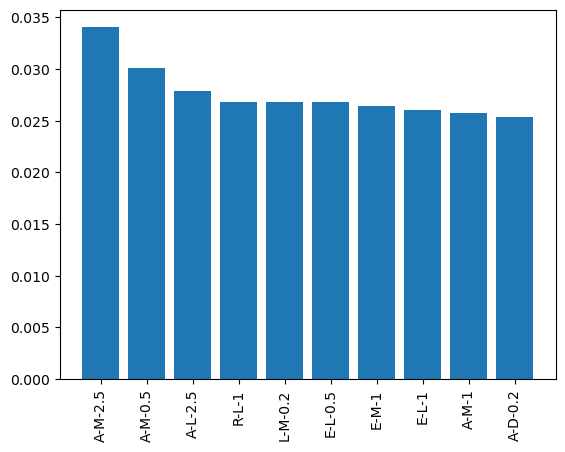

In [9]:
plt.bar(us_prod['Product ID'], us_prod['Percent Purchased'])
plt.xticks(rotation=90)

Medium Roast Arabica coffee appears to be the most popular coffee and roast type purchased in the U.S. as it occupies the number 1, 2 and 9 spot of top 10 in percent purchased coffee. Particulary, the 2.5kg and .5kg products are the most purchased in the U.S.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

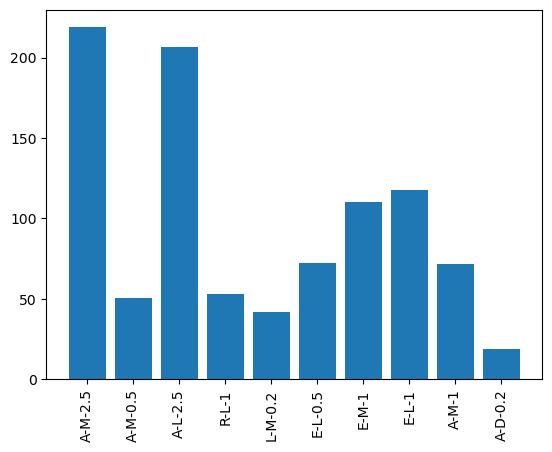

In [10]:
plt.bar(us_prod['Product ID'], us_prod['Total Unit Profit'])
plt.xticks(rotation=90)


The total profits gained by product appears to be motly determined by product size. The larger the product, the more total profit gained.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

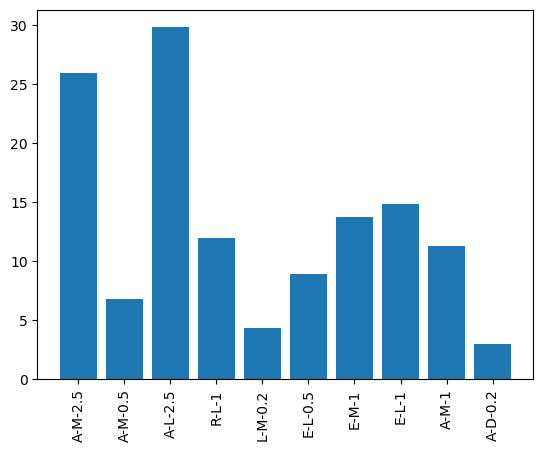

In [11]:
plt.bar(us_prod['Product ID'], us_prod['Unit Price'])
plt.xticks(rotation=90)

The inidividual price per product similarly is determined by product size. This graph and the total profit graphs are incredibly similar in their appearance, hinting at a strong correlation between the two. 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

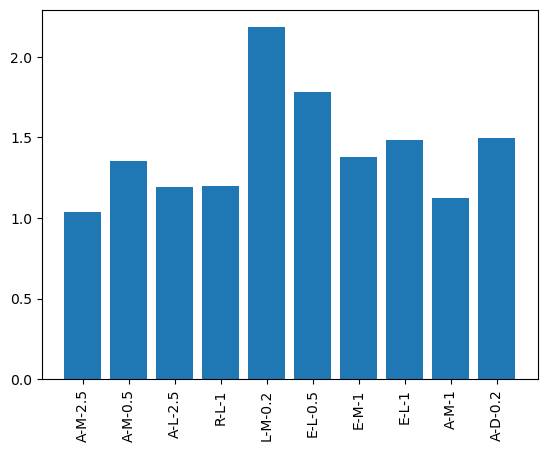

In [12]:
plt.bar(us_prod['Product ID'], us_prod['Price per 100g'])
plt.xticks(rotation=90)

Conversely, Price per 100g is higher the lower the product size. Coffee type does also play a role here, with product R-L-1 costing the same per 100g as A-L-2.5. Possible reasons for this is that labor costs don't get more expensive while filling larger bags and additionally the need for more bags at the smaller size are likely driving costs up. Shipping costs may also play a role as the initial cost to ship, especially internationally, is high and shipping in bulk may be more cost effective.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

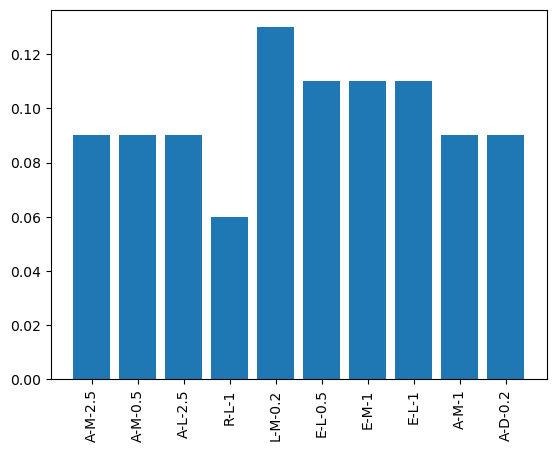

In [13]:
plt.bar(us_prod['Product ID'], us_prod['Unit Profit Percentage'])
plt.xticks(rotation=90)

As weight goes up, price per 100g goes down, relative to each coffee and roast type. Profit percentage is set by coffee type rather than roast or weight.

Prouct L-M-0.2 is the most profitable and 5th most purchased in the U.S.

### Ireland

In [14]:
ireland_prod.describe()

,Unnamed: 0,Unit Price,Unit Profit,Unit Profit Percentage,Unit Weight(kg),Price per 100g,Quantity,Total Quantity,Percent Purchased,Total Unit Sales,Total Unit Profit,Total Unit Weight Sold,Total Weight,Percent of Total Weight Shipped
count,10.000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.0,10.000000,10.000000,10.000000,10.000000,10.0,10.000000
mean,64.800,12.149500,1.093405,0.088000,1.080000,1.383520,22.40000,537.0,0.041713,263.887500,24.198045,23.550000,544.3,0.043267
std,44.304,10.224191,1.094534,0.028206,1.027186,0.431234,4.40202,0.0,0.008197,224.220042,26.058917,23.350815,0.0,0.042901
min,0.000,2.685000,0.161100,0.060000,0.200000,0.823400,16.00000,537.0,0.029795,48.330000,2.899800,3.600000,544.3,0.006614
25%,27.000,3.802500,0.324000,0.060000,0.200000,1.105800,19.25000,537.0,0.035847,93.712500,7.890413,5.550000,544.3,0.010197
50%,79.000,9.340000,0.954000,0.090000,0.750000,1.266950,22.00000,537.0,0.040968,204.870000,19.021500,15.250000,544.3,0.028018
75%,102.000,18.251250,1.210050,0.105000,2.125000,1.682625,25.50000,537.0,0.047486,383.257500,26.314875,35.250000,544.3,0.064762
max,116.000,29.785000,3.872050,0.130000,2.500000,2.227500,30.00000,537.0,0.055866,714.840000,92.929200,65.000000,544.3,0.119419


Median weight is .75kg, between .5kg and 1kg bags. Mean weight is 1.08kg. Total bags purchased is 537 with a total weight of 544.3kg. 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

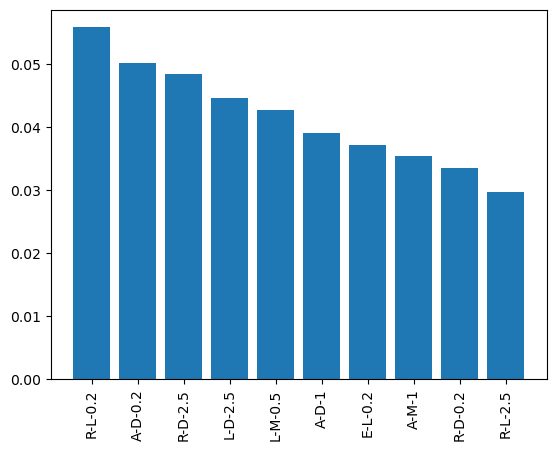

In [15]:
plt.bar(ireland_prod['Product ID'], ireland_prod['Percent Purchased'])
plt.xticks(rotation=90)

The most purchased product in Ireland is a light roast Robusta .2kg bag, followed by an dark roast Arabica .2kg bag. 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

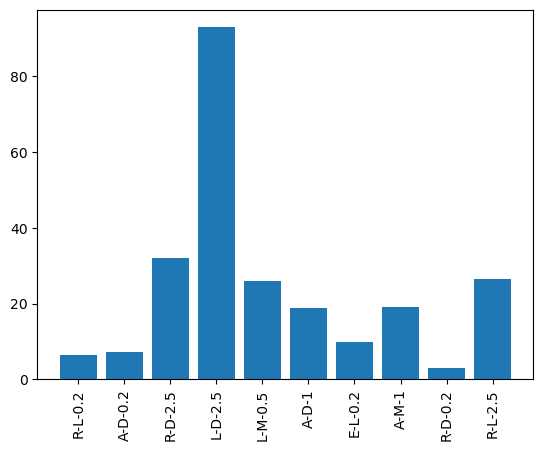

In [16]:
plt.bar(ireland_prod['Product ID'], ireland_prod['Total Unit Profit'])
plt.xticks(rotation=90)

The dark roast liberica 2.5kg bag is far and away bringing in the most total profit.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

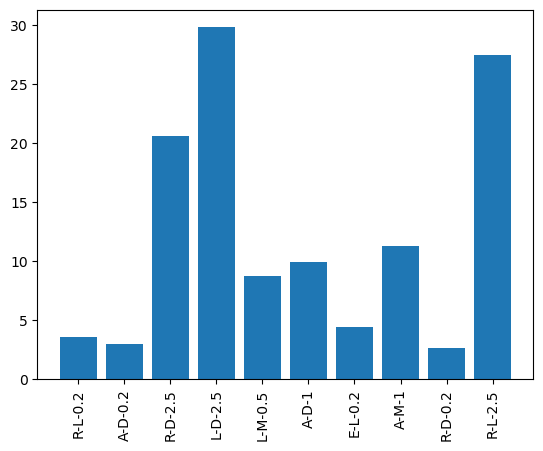

In [17]:
plt.bar(ireland_prod['Product ID'], ireland_prod['Unit Price'])
plt.xticks(rotation=90)

Pricing again is influenced heavily by weight, with 2.5kg products costing the most and .2kg products costing the least

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

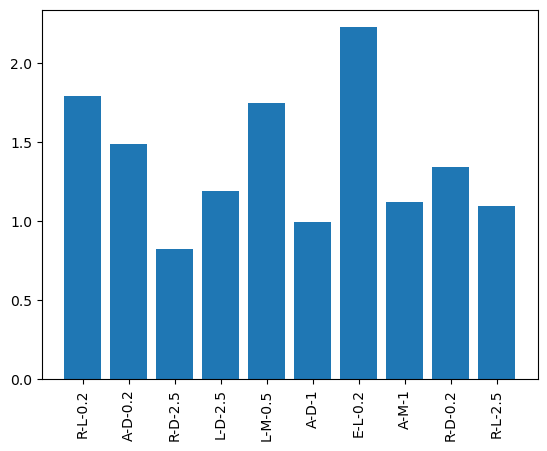

In [18]:
plt.bar(ireland_prod['Product ID'], ireland_prod['Price per 100g'])
plt.xticks(rotation=90)

Price per 100g is inverted, where .2kg bags typically cost the most and 2.5kg bags cost the least. However, disparity amongst coffee type is more apparent here, with Liberica products costing more despite having a larger bag size.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

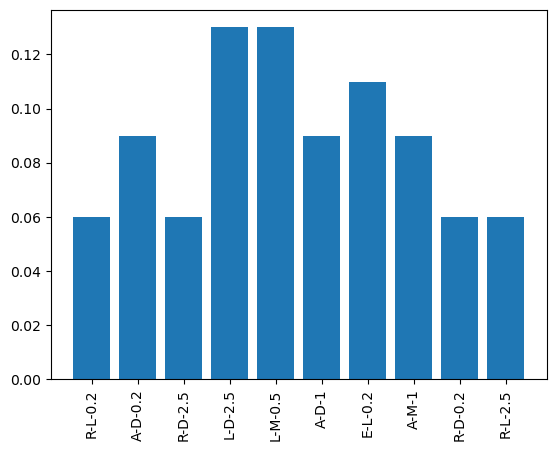

In [19]:
plt.bar(ireland_prod['Product ID'], ireland_prod['Unit Profit Percentage'])
plt.xticks(rotation=90)

Profit percentage is solely based on Coffee type, with Liberica at 13%, Excelsa at 11%, Arabica at 9%, and Robusta at 6%, the same as the United States

### United Kingdom

In [20]:
uk_prod.describe()

,Unnamed: 0,Unit Price,Unit Profit,Unit Profit Percentage,Unit Weight(kg),Price per 100g,Quantity,Total Quantity,Percent Purchased,Total Unit Sales,Total Unit Profit,Total Unit Weight Sold,Total Weight,Percent of Total Weight Shipped
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,10.000000,10.000000,10.000000,10.0,10.000000
mean,80.700000,8.849000,0.871485,0.094000,0.660000,1.570130,12.200000,254.0,0.048031,102.159000,10.031820,7.500000,217.2,0.034530
std,33.256745,7.105754,0.830676,0.030258,0.688315,0.437629,2.529822,0.0,0.009960,68.310948,8.141182,6.799346,0.0,0.031305
min,37.000000,2.685000,0.161100,0.060000,0.200000,0.995000,9.000000,254.0,0.035433,26.850000,1.611000,2.000000,217.2,0.009208
25%,52.750000,5.058750,0.436087,0.060000,0.275000,1.231125,10.000000,254.0,0.039370,72.337500,5.886525,3.525000,217.2,0.016229
50%,81.500000,7.710000,0.607575,0.110000,0.500000,1.542000,12.000000,254.0,0.047244,85.800000,7.665750,5.500000,217.2,0.025322
75%,107.500000,8.865000,0.961950,0.110000,0.500000,1.773000,13.750000,254.0,0.054134,113.062500,12.028575,7.625000,217.2,0.035106
max,126.000000,27.945000,3.073950,0.130000,2.500000,2.377500,16.000000,254.0,0.062992,279.450000,30.739500,25.000000,217.2,0.115101


Median weight is .5kg, while  mean weight is .66kg. Total bags purchased is 254, weighing 217.2kg

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

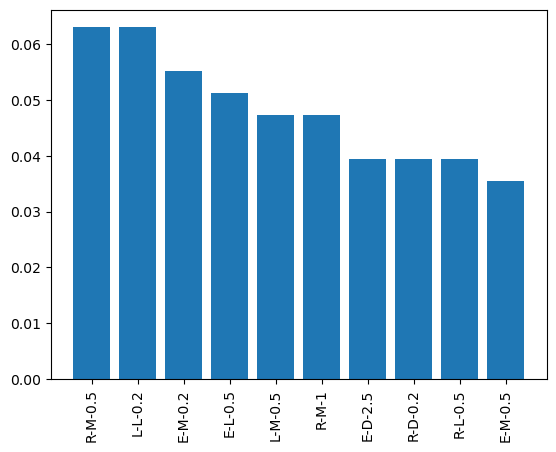

In [21]:
plt.bar(uk_prod['Product ID'], uk_prod['Percent Purchased'])
plt.xticks(rotation=90)

The medium roast robusta .5kg bag was teh most purchased followed by the Light roast liberica .2kg bag. The most popular products in the uk tend to be the smaller bag sizes.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

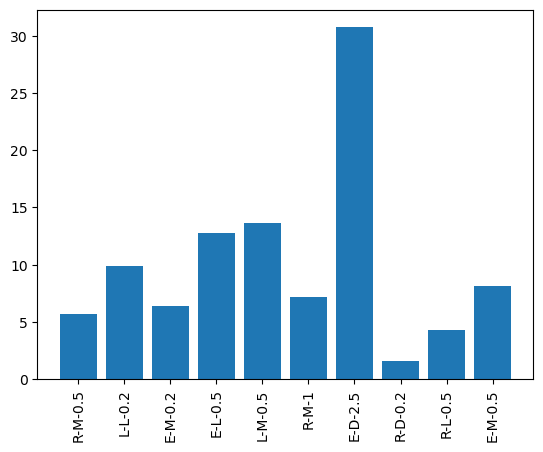

In [22]:
plt.bar(uk_prod['Product ID'], uk_prod['Total Unit Profit'])
plt.xticks(rotation=90)

The dark roast Excelsa 2.5kg bag brought in the most profit by more than double the next product.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

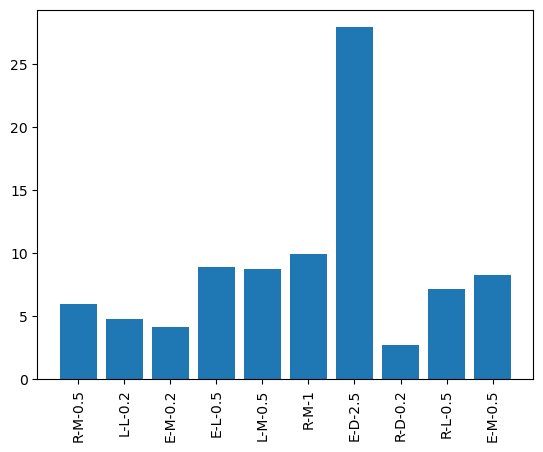

In [23]:
plt.bar(uk_prod['Product ID'], uk_prod['Unit Price'])
plt.xticks(rotation=90)

Likewise, the Ecelsa 2.5kg bag was more expensive than the rest by more than double.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

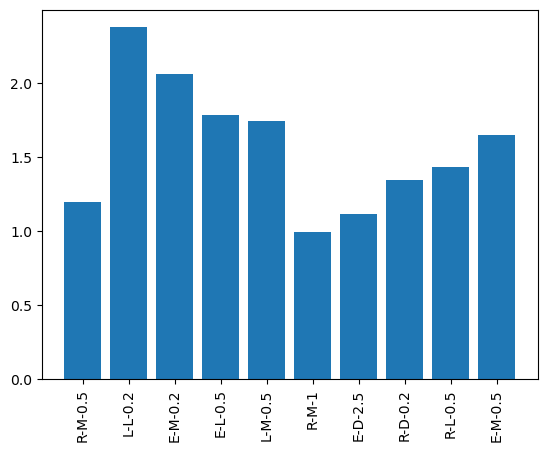

In [24]:
plt.bar(uk_prod['Product ID'], uk_prod['Price per 100g'])
plt.xticks(rotation=90)

The light roast liberica .2kg bag was the most expensive per 100g while the dark roast Excelsa 2.5kg bag was the cheapest per 100g

### Time Series

I want to explore the potential seasonality of coffee sales and break it down by different categories to gain insight.

In [25]:
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1000 non-null   int64  
 1   Order ID                1000 non-null   object 
 2   Order Date              1000 non-null   object 
 3   Customer ID             1000 non-null   object 
 4   Product ID              1000 non-null   object 
 5   Quantity                1000 non-null   float64
 6   Sales                   1000 non-null   float64
 7   Coffee Type             1000 non-null   object 
 8   Roast Type              1000 non-null   object 
 9   Unit Weight(kg)         1000 non-null   float64
 10  Unit Price              1000 non-null   float64
 11  Price per 100g          1000 non-null   float64
 12  Unit Profit             1000 non-null   float64
 13  Address Line 1          1000 non-null   object 
 14  City                    1000 non-null   o

In [26]:
coffee_df['Order Date'] = pd.to_datetime(coffee_df['Order Date'])
monthly_sales_df= coffee_df.groupby(coffee_df['Order Date'].dt.to_period('M'))['Sales'].sum().reset_index()

In [31]:
monthly_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype    
---  ------      --------------  -----    
 0   Order Date  44 non-null     period[M]
 1   Sales       44 non-null     float64  
dtypes: float64(1), period[M](1)
memory usage: 832.0 bytes


In [33]:
monthly_sales_df['Order Date'] = monthly_sales_df['Order Date'])

AttributeError: module 'pandas' has no attribute 'to_timestamp'

TypeError: float() argument must be a string or a number, not 'Period'

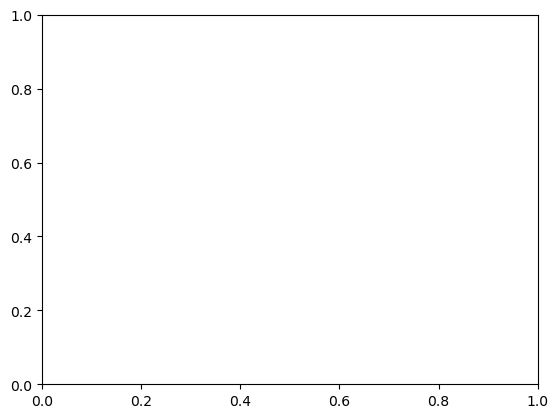

In [28]:
plt.plot(monthly_sales_df['Order Date'], monthly_sales_df['Sales'], linestyle = 'dotted')

plt.title('Coffee Sales')
